# STAT207 Lab 7: Simple Linear Regression Models and Inference

Due: Tuesday 10/20/20 11:59pm CST

The following dataset contains health information about 13 brands of hotdogs. Let's explore the numerical relationships in this dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import t

### a.) [1 pt] Load the hot-dogs.csv dataset into a dataframe called df. Then print the whole dataframe.

In [2]:
df=pd.read_csv('hot-dogs.csv')
df

,Calories,Fat,SatFat,Sodium
0,150,14,6.0,420
1,170,15,6.0,470
2,120,11,4.5,350
3,120,10,4.5,360
4,90,6,2.5,270
5,180,16,7.0,550
6,170,15,6.0,530
7,140,13,6.0,460
8,110,8,3.0,330
9,150,13,5.0,490


### b.) [1 pt] Visualize the histograms for each of the four numerical variables.

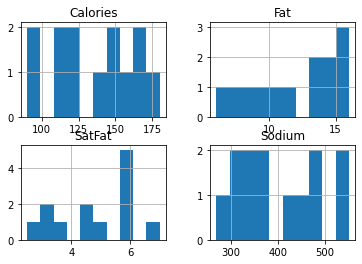

In [3]:
df.hist()
plt.show()

### c.) [2 pt] Create a scatterplot for each possible pairing of the four numerical variables. *(Hint: There are 6 possible pairs.)*

<function matplotlib.pyplot.show(close=None, block=None)>

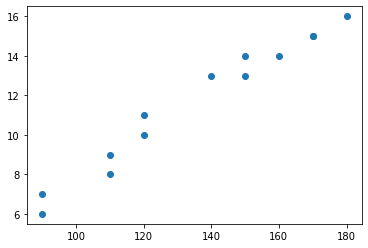

In [4]:
plt.scatter(df['Calories'],df['Fat'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

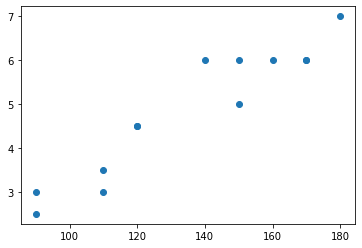

In [5]:
plt.scatter(df['Calories'],df['SatFat'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

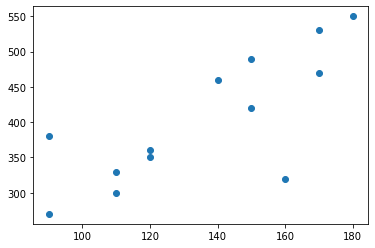

In [6]:
plt.scatter(df['Calories'],df['Sodium'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

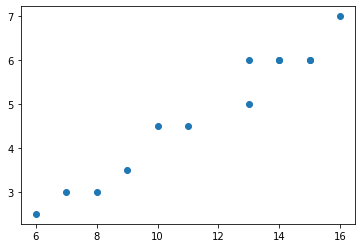

In [7]:
plt.scatter(df['Fat'],df['SatFat'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

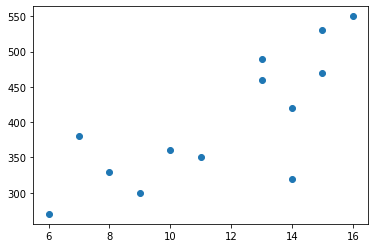

In [8]:
plt.scatter(df['Fat'],df['Sodium'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

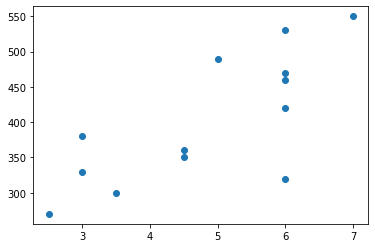

In [9]:
plt.scatter(df['SatFat'],df['Sodium'])
plt.show

### d.) [1pt] Would it be appropriate to use the correlation coefficient to quantify the strength and direction the relationship between each of these pairs of numerical variables?

These pairs of numerical variables appear linear relationship, so it is appropriate to use the correlation coefficient to quantify the strength and direction of the relationship.

### e.) [1 pt] Using Python calculate the correlation between each of four numerical attributes. 

In [10]:
df.corr()

,Calories,Fat,SatFat,Sodium
Calories,1.000000,0.983209,0.946980,0.777585
Fat,0.983209,1.000000,0.978761,0.779985
SatFat,0.946980,0.978761,1.000000,0.755200
Sodium,0.777585,0.779985,0.755200,1.000000


### f.) [1 pt] Use your answer from (e) to determine, which two pairs of variables have the *weakest* linear relationship? Explain.

'SatFat' and 'Sodium' have the weakest linear relationship

### g.) [1 pt] Compare your answer to what you see in the scatterplots. Does this make sense? Explain.

It makes sense. In the plot graph of SatFat and Sodium, the points do not really make a clear straight line. And some points are really low or high, so the residuals will be not really close to zero --> Weak linear relation. And The correlation between these two attributes is the smallest(0.755).

### h.) [1 pt] What are the sample means of Fat and SatFat?

In [11]:
mn1=round(df['Fat'].mean(),3)
mn2=round(df['SatFat'].mean(),3)
print('Fat: ',mn1)
print('SatFat: ',mn2)

Fat:  11.615
SatFat:  4.846


### i.) [2 pt] This dataset only has 13 observations. Calculate the covariance between Fat and SatFat by hand. 
(You can use df.cov() to check your work).

In [12]:
#mn1 is sample mean of Fat and mn2 is sample mean of SatFat
s=(14-mn1)*(6-mn2)+(15-mn1)*(6-mn2)+(11-mn1)*(4.5-mn2)+(10-mn1)*(4.5-mn2)+(6-mn1)*(2.5-mn2)+(16-mn1)*(7-mn2)+(15-mn1)*(6-mn2)+(13-mn1)*(6-mn2)+(8-mn1)*(3-mn2)+(13-mn1)*(5-mn2)+(14-mn1)*(6-mn2)+(9-mn1)*(3.5-mn2)+(7-mn1)*(3-mn2)

In [13]:
print('covariance: ', s/(len(df)-1))

covariance:  4.769230833333334


In [14]:
#Checking the answer
df.cov().iloc[2,1]

4.769230769230769

### j.) [2 pt] We suspect that Fat affects the amount of calories that a hotdog will have. Fit a linear regression model that has Calories as the response variable and Fat as the explanatory variable. Display the model summary.

In [15]:
#making new df with Calories and Fat
df1=pd.concat([df['Fat'],df['Calories']], axis=1, keys=['Fat','Calories'])
results=smf.ols('Calories ~ Fat', data=df1).fit()
results.summary()

C:\Tuan\Coding\Python\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     319.3
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.78e-09
Time:                        18:32:22   Log-Likelihood:                -40.335
No. Observations:                  13   AIC:                             84.67
Df Residuals:                      11   BIC:                             85.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0405      6.115      4.913      0.000      16.582      43.499
Fat            9.0694      0.508     17.870      0.000       7.952      10.186
==============================================================================
Omnibus:                        1.742   Durbin-Watson:                   2.285
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.161
Skew:                          -0.488   Prob(JB):                        0.560
Kurtosis:                       1.908   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### k.) [2 pt] Using this output, formulate the linear regression model.
* Put your response and explanatory variables in words (ie. don't put "x" and "y" for instance.)
* Put a "hat" $\hat{}$ over your reponse variable value to indicate that this equation models the predicted value for the response variable value.

$$\hat{Calories}= 30.0405 + 9.0694 (Fat) 
$$

### l.) [1 pt] The first hotdog in our dataset has a 14g of fat and 150 calories. What would our model *predict* the calorie content of a hotdog with 14g of fat to have?

In [16]:
p_calo=sum(results.params * [1, 14])
print(p_calo)

157.01156069364163


### m.) [1 pt] What is the residual of this hotdog with 14g of fat and 150 calories?

In [17]:
r=150-p_calo
print("residual: ",r)

residual:  -7.011560693641627


### n.) [1 pt] Did our model overestimate or underestimate the calorie content of this hotdog with 14g of fat and 150 calories?

Since $\hat{Calorie}$= 157 > observed Calorie= 150 and the residual is a negative number, the model overestimates the calorie content of the hotdog with 14g fat

### o.) [2 pt]Use this model output to determine what proportion of the total variability of calories is explained by the model?

In [18]:
results.rsquared

0.9667005686102036

The proportion of the total variability of calories is explained by the model is 96.67%

### p.) [2 pt] Use the regression summary output to create a 90% confidence interval for the population slope for Fat (ie. $\beta_1$.)

In [19]:
results.summary().tables[1]

C:\Tuan\Coding\Python\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,30.0405,6.115,4.913,0.000,16.582,43.499
Fat,9.0694,0.508,17.870,0.000,7.952,10.186


In [20]:
zq=t.ppf(1-.1/2, df=13-1-1)
se=0.508
beta_1=9.0694
print('Confidence interval: ', (round(beta_1-zq*se,3),round(beta_1+zq*se,3)))


Confidence interval:  (8.157, 9.982)


### q.) [1 pt] Use this confidence interval to determine if there is sufficent evidence to suggest that the the population slope of Fat is non-zero.

Since the null hypothesis (the slope=0) is not included in the 90% confidence interval, there is sufficient evidence to suggest that the population slope of Fat is non-zero

### r.) [1 pt] Using your answer from above, is there evidence to suggest that there exists a linear association between the Fat and Calories of the whole population of hotdogs?

Since the null hypothesis (the slope=0) is not included in the 90% confidence interval, we can reject the null hypothesis. Therefore, there exists a linear association between the Fat and Calories of the whole population of hotdogs

### s.) [1 pt] Find (or calculate) the test statistic that will test whether there exists evidence to suggest the population slope of hotdogs is non-zero.

In [21]:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,30.0405,6.115,4.913,0.000,16.582,43.499
Fat,9.0694,0.508,17.870,0.000,7.952,10.186


In [22]:
t= 9.0694/0.508
print('Test statistic: ',t)

Test statistic:  17.853149606299212
